# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import pprint
# Import API key
from config import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# Import API Key from a file on your computer

# This is an example, need to figure out how to do it

#with open('/Users/Mille/Desktop/API Keys/config.py', 'r') as r:
    #data=json.load(r)
    #gkey=data[0]['gkey']

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#setup the API call
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
q_url = f"{url}appid={wkey}&units={units}&q="

#create lists to hold response data
lat = []
lon = []
temp_max = []
humidity = []
wind_speed = []
cloudy = []
name = []
country = []
date = []

#my_city = "New Braunfels"

#response = requests.get(q_url + my_city).json()

for city in cities:
    response = requests.get(q_url + city).json()
    
    try:
        print(f'working on {city}')
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudy.append(response['clouds']['all'])
        name.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except:
        print(f'{city} is missing info')
        pass



working on qaanaaq
working on samaipata
working on lianyuan
working on nalut
working on acapulco
working on mar del plata
working on mascote
working on punta arenas
working on awjilah
working on ocos
working on dalbandin
working on waddan
working on nizhneyansk
nizhneyansk is missing info
working on lata
working on herouville-saint-clair
working on weligama
working on bambous virieux
working on taltal
working on bluff
working on jamestown
working on mataura
working on waitati
working on busselton
working on kahului
working on upernavik
working on carman
working on ushuaia
working on dikson
working on severodvinsk
working on jalu
working on berlevag
working on severomorsk
working on norman wells
working on khatanga
working on luderitz
working on hermanus
working on fairbanks
working on saskylakh
working on canico
working on nikolskoye
working on ginda
working on rikitea
working on cape town
working on port hardy
working on saint-francois
working on belushya guba
belushya guba is missing

In [9]:
print(len(name))

590


In [10]:
print(len(lat))

590


In [11]:
print(len(lon))

590


In [12]:
print(len(temp_max))

590


In [13]:
print(len(date))

590


In [14]:
print(len(country))

590


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_dict = {
    "City": name,
    "Lat": lat,
    "Long": lon,
    "Max Temp (F)": temp_max,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudy,
    "Windspeed (mph)": wind_speed,
    "Country": country,
    "Date": date,
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file, index=False)
weather_data.head()

,City,Lat,Long,Max Temp (F),Humidity (%),Cloudiness (%),Windspeed (mph),Country,Date
0,Qaanaaq,77.4840,-69.3632,32.70,65,53,6.71,GL,1619801430
1,Samaipata,-18.1500,-63.8667,65.79,43,3,6.82,BO,1619801231
2,Lianyuan,27.6883,111.6642,69.84,66,71,3.53,CN,1619801431
3,Nālūt,30.3333,10.8500,99.50,11,54,15.70,LY,1619801431
4,Acapulco de Juárez,16.8634,-99.8901,82.40,74,90,10.36,MX,1619801431


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.

weather_data[weather_data['Humidity (%)'].gt(100)].index


Int64Index([], dtype='int64')

In [29]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

quartiles = weather_data['Humidity (%)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq - (1.5*iqr)

print(f'lower outliers {lower_bound}')
print(f'upper outliers {upper_bound}')
print(type(lower_bound))

lower outliers 0.625
upper outliers 34.375
<class 'numpy.float64'>


In [81]:
clean_city_data = weather_data.drop(weather_data[(weather_data['Humidity (%)'] < lower_bound) | 
                                                 (weather_data['Humidity (%)'] > upper_bound) ].index,inplace = False)

clean_city_data.head()


,City,Lat,Long,Max Temp (F),Humidity (%),Cloudiness (%),Windspeed (mph),Country,Date
3,Nālūt,30.3333,10.8500,99.50,11,54,15.70,LY,1619801431
8,Awjilah,29.1081,21.2869,97.11,8,0,9.22,LY,1619801433
10,Dalbandin,28.8947,64.4101,81.10,28,87,13.60,PK,1619801433
11,Waddān,29.1614,16.1390,100.00,6,25,14.41,LY,1619801434
24,Carman,49.4992,-98.0016,48.20,31,100,12.66,CA,1619801437


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

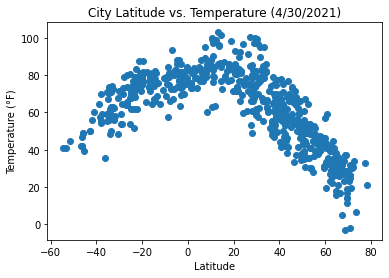

In [83]:
x = weather_data['Lat']
y = weather_data['Max Temp (F)']
plt.title("City Latitude vs. Temperature (4/30/2021)")
plt.xlabel("Latitude")
plt.ylabel('Temperature (°F)')
plt.scatter(x,y)
plt.savefig("images/lat_v_temp.png")
plt.show()

This Scatter plot shows that as Latitude gets further from zero (equator) the max temp decreases.

## Latitude vs. Humidity Plot

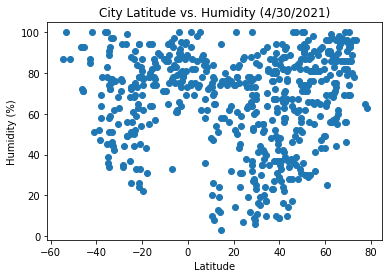

In [51]:
x = weather_data['Lat']
y = weather_data['Humidity (%)']
plt.title("City Latitude vs. Humidity (4/30/2021)")
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.scatter(x,y)
plt.savefig("images/lat_v_humidiity.png")
plt.show()

This scatter plot shows that humidity does not appear to be tied to how close the city is to the equator.

## Latitude vs. Cloudiness Plot

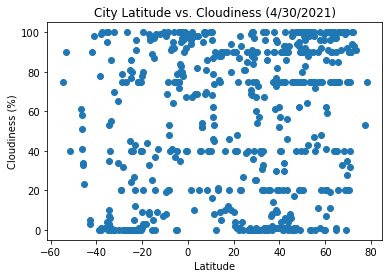

In [52]:
x = weather_data['Lat']
y = weather_data['Cloudiness (%)']
plt.title("City Latitude vs. Cloudiness (4/30/2021)")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.scatter(x,y)
plt.savefig("images/lat_v_cloudiness.png")
plt.show()

This scatter plot also shows that closeness to the equator does not appear to affect the cloudiness of a city.

## Latitude vs. Wind Speed Plot

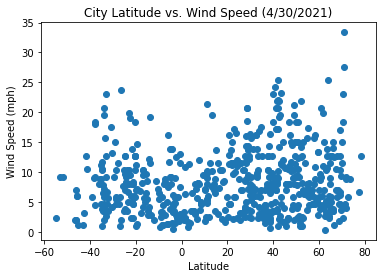

In [53]:
x = weather_data['Lat']
y = weather_data['Windspeed (mph)']
plt.title("City Latitude vs. Wind Speed (4/30/2021)")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.scatter(x,y)
plt.savefig("images/lat_v_wind_speed.png")
plt.show()

This Scatter plot also shows that there is no correlation between closeness to the equator and wind speed.

## Linear Regression

In [125]:
North_data = weather_data.drop(weather_data[(weather_data['Lat'] <= 0) ].index,inplace = False)
South_data = weather_data.drop(weather_data[(weather_data['Lat'] > 0) ].index,inplace = False)
South_data.head()

,City,Lat,Long,Max Temp (F),Humidity (%),Cloudiness (%),Windspeed (mph),Country,Date
1,Samaipata,-18.1500,-63.8667,65.79,43,3,6.82,BO,1619801231
5,Mar del Plata,-38.0023,-57.5575,70.00,64,0,18.41,AR,1619801279
6,Mascote,-15.5631,-39.3025,81.36,64,25,6.49,BR,1619801432
7,Punta Arenas,-53.1500,-70.9167,41.00,100,90,9.22,CL,1619801432
15,Bambous Virieux,-20.3428,57.7575,78.80,78,40,12.66,MU,1619801435


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.861397506387462


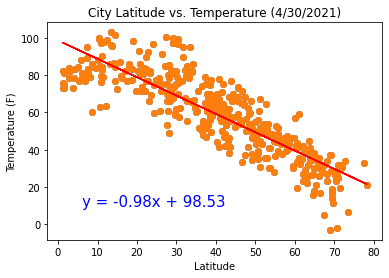

In [126]:
x = North_data['Lat']
y = North_data['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("City Latitude vs. Temperature (4/30/2021)")
plt.xlabel("Latitude")
plt.ylabel('Temperature (F)')
plt.scatter(x,y)
plt.savefig("images/North_lat_v_max_temp.png")
print(f'The r-value is: {rvalue}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7471608218894523


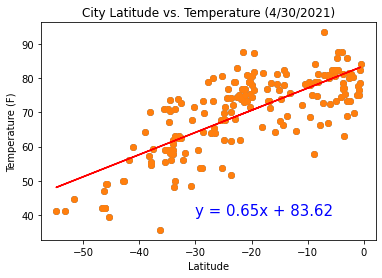

In [127]:
x = South_data['Lat']
y = South_data['Max Temp (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="blue")
plt.title("City Latitude vs. Temperature (4/30/2021)")
plt.xlabel("Latitude")
plt.ylabel('Temperature (F)')
plt.scatter(x,y)
plt.savefig("images/South_lat_v_max_temp.png")
print(f'The r-value is: {rvalue}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.22401667443575135


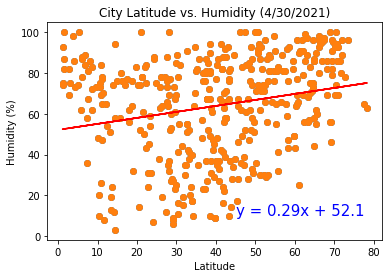

In [128]:
x = North_data['Lat']
y = North_data['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="blue")
plt.title("City Latitude vs. Humidity (4/30/2021)")
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.scatter(x,y)
plt.savefig("images/North_lat_v_humidity.png")
print(f'The r-value is: {rvalue}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1714651113421958


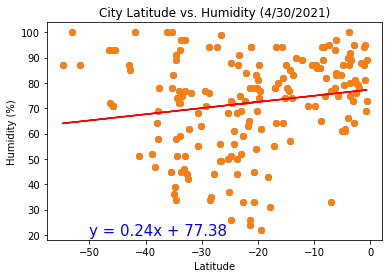

In [129]:
x = South_data['Lat']
y = South_data['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="blue")
plt.title("City Latitude vs. Humidity (4/30/2021)")
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.scatter(x,y)
plt.savefig("images/South_lat_v_humidity.png")
print(f'The r-value is: {rvalue}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14798602169407069


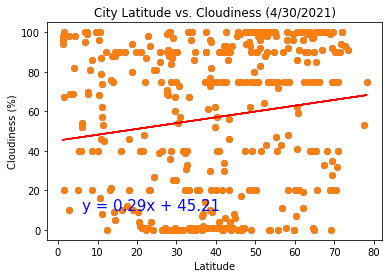

In [130]:
x = North_data['Lat']
y = North_data['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("City Latitude vs. Cloudiness (4/30/2021)")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.scatter(x,y)
plt.savefig("images/North_lat_v_cloudiness.png")
print(f'The r-value is: {rvalue}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.3036370115342312


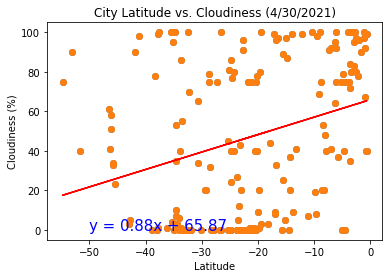

In [131]:
x = South_data['Lat']
y = South_data['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,0),fontsize=15,color="blue")
plt.title("City Latitude vs. Cloudiness (4/30/2021)")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.scatter(x,y)
plt.savefig("images/South_lat_v_cloudiness.png")
print(f'The r-value is: {rvalue}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11599917901415999


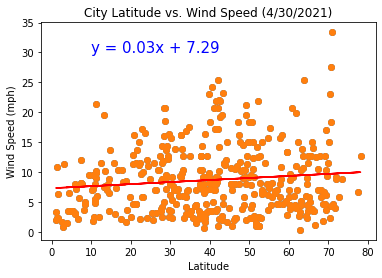

In [132]:
x = North_data['Lat']
y = North_data['Windspeed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(10,30),fontsize=15,color="blue")
plt.title("City Latitude vs. Wind Speed (4/30/2021)")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.scatter(x,y)
plt.savefig("images/North_lat_v_windspeed.png")
print(f'The r-value is: {rvalue}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.12922485710687565


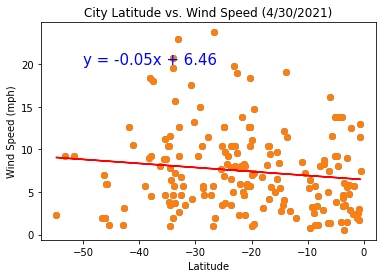

In [133]:
x = South_data['Lat']
y = South_data['Windspeed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="blue")
plt.title("City Latitude vs. Wind Speed (4/30/2021)")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.scatter(x,y)
plt.savefig("images/South_lat_v_windspeed.png")
print(f'The r-value is: {rvalue}')
plt.show()